# Unfolding

Unfolding is a method of removing systematic effects from  adistribution of interest.


In [1]:
import matplotlib.pyplot as plt
import numpy as np


In [2]:
%matplotlib inline

## Large Gaussian Resolution

In [3]:
#Construct True Distribution
x= [i for i in range(10)]
y=  100 *( np.sin([float(i)/2. for i in range(20)]) + 1 )
_y = []
for it, i in enumerate(y):
    if it%2 == 0: continue
    _y.append(i + y[it-1])
y = _y

In [4]:
#Construst Unfolding Matrix 
R = []
for i in range(10):
    R.append([])
    for j in range(10):
        r = 0
        if i==j:
            r = .26
            if (i == 0) | (i == 9):
                r += .21 + .16
        if abs(i-j) == 1:
            r = .21
            if ((i == 1) & (j == 0)) | ((i == 8) & (j == 9)):
                r += .16
        if abs(i-j) == 2:
            r = .16
        R[i].append( r )
R = np.array(R)
R

array([[ 0.63,  0.21,  0.16,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.37,  0.26,  0.21,  0.16,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.16,  0.21,  0.26,  0.21,  0.16,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.16,  0.21,  0.26,  0.21,  0.16,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.16,  0.21,  0.26,  0.21,  0.16,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.16,  0.21,  0.26,  0.21,  0.16,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.16,  0.21,  0.26,  0.21,  0.16,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.16,  0.21,  0.26,  0.21,
         0.16],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.16,  0.21,  0.26,
         0.37],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.16,  0.21,
         0.63]])

In [5]:
#Construct 
_y = np.dot(R, y)
v = []
for i in _y:
    temp = np.random.poisson(i)
    v.append(temp)
v = np.array(v)
v

array([305, 301, 245, 186, 136, 155, 194, 275, 292, 256])

In [6]:
np.set_printoptions(suppress=True)
print np.round( np.dot(np.dot(np.linalg.inv(R), np.diag(_y)), np.linalg.inv(R).T), 0)
print np.round( np.dot(np.dot(np.linalg.inv(R), np.identity(10)), np.linalg.inv(R).T), 2)

[[  29320.  -62320.  -25144.   57993.   15030.  -14780.  -56483.   22149.
    61553.  -27487.]
 [ -62320.  172676.    3940. -114519.  -24086.   34923.  137801.  -93460.
  -105534.   61790.]
 [ -25144.    3940.   91203.  -70209.  -22652.   11437.   27110.   41608.
   -92184.   21678.]
 [  57993. -114519.  -70209.  134062.   23841.  -31922. -104162.   27942.
   136560.  -56173.]
 [  15030.  -24086.  -22652.   23841.   25845.  -15884.  -31885.   11363.
    34869.  -14736.]
 [ -14780.   34923.   11437.  -31922.  -15884.   25677.   24011.  -22602.
   -24127.   14994.]
 [ -56483.  137801.   27110. -104162.  -31885.   24011.  134529.  -71174.
  -113988.   58003.]
 [  22149.  -93460.   41608.   27942.   11363.  -22602.  -71174.   91730.
     4590.  -25475.]
 [  61553. -105534.  -92184.  136560.   34869.  -24127. -113988.    4590.
   170938.  -61795.]
 [ -27487.   61790.   21678.  -56173.  -14736.   14994.   58003.  -25475.
   -61795.   29166.]]
[[ 112.85 -239.79 -100.57  231.85   52.36  -53.63

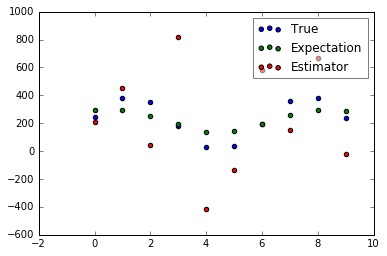

In [7]:
plt.scatter([i for i in range(len(y))], y, label="True")
plt.scatter([i for i in range(len(y))], _y, c="green", label="Expectation")
plt.scatter([i for i in range(10)], np.dot(v, np.linalg.inv(R)), c="red", label="Estimator")
plt.legend(framealpha=0.5)

## Small Gaussian Resolution

In [8]:
#Construct unfolding matrix
R = []
for i in range(10):
    R.append([])
    for j in range(10):
        r = 0
        if i==j:
            r = .5
            if (i == 0) | (i == 9):
                r += .16 + .09
        if abs(i-j) == 1:
            r = .16
            if ((i == 1) & (j == 0)) | ((i == 8) & (j == 9)):
                r += .09
        if abs(i-j) == 2:
            r = .09
        R[i].append( r )
R = np.array(R)

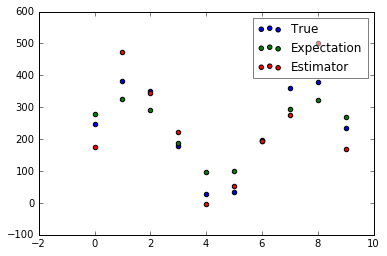

In [9]:
_y = np.dot(R, y)
v = []
for i in _y:
    temp = np.random.poisson(i)
    v.append(temp)
v = np.array(v)

plt.scatter([i for i in range(len(y))], y, label="True")
plt.scatter([i for i in range(len(y))], _y, c="green", label="Expectation")
plt.scatter([i for i in range(10)], np.dot(v, np.linalg.inv(R)), c="red", label="Estimator")
plt.legend(framealpha=0.5)

In [10]:
np.set_printoptions(suppress=True)
print np.round( np.dot(np.dot(np.linalg.inv(R), np.diag(_y)), np.linalg.inv(R).T), 0)
print np.round( np.dot(np.dot(np.linalg.inv(R), np.identity(10)), np.linalg.inv(R).T), 2)

[[  711.  -667.   -75.   221.   -52.   -37.    26.     2.    -8.     2.]
 [ -667.  2316.  -916.  -352.   344.   -26.   -85.    38.    10.    -8.]
 [  -75.  -916.  2010.  -663.  -298.   279.   -16.   -83.    38.     2.]
 [  221.  -352.  -663.  1399.  -412.  -268.   269.   -17.   -85.    26.]
 [  -52.   344.  -298.  -412.   807.  -275.  -269.   282.   -27.   -37.]
 [  -37.   -26.   279.  -268.  -275.   835.  -432.  -301.   346.   -51.]
 [   26.   -85.   -16.   269.  -269.  -432.  1456.  -684.  -354.   221.]
 [    2.    38.   -83.   -17.   282.  -301.  -684.  2044.  -917.   -78.]
 [   -8.    10.    38.   -85.   -27.   346.  -354.  -917.  2291.  -650.]
 [    2.    -8.     2.    26.   -37.   -51.   221.   -78.  -650.   686.]]
[[ 2.52 -2.22 -0.33  0.89 -0.2  -0.19  0.12  0.01 -0.03  0.01]
 [-2.22  7.3  -2.93 -1.51  1.56 -0.13 -0.39  0.17  0.04 -0.03]
 [-0.33 -2.93  7.11 -2.77 -1.5   1.53 -0.13 -0.38  0.17  0.01]
 [ 0.89 -1.51 -2.77  7.4  -2.93 -1.52  1.58 -0.13 -0.39  0.12]
 [-0.2   1.56 -1.

In [11]:
np.dot(v, np.linalg.inv(R))

array([ 175.44150316,  473.71643449,  344.33071119,  221.98031624,
         -2.96189993,   52.84836642,  194.65107483,  276.97022606,
        501.88954202,  170.13372553])

In [26]:
np.diagonal(np.dot(np.dot(np.linalg.inv(R), np.diag(_y)), np.linalg.inv(R).T))**.5 / _y

array([ 0.09557989,  0.14754155,  0.15452223,  0.19950052,  0.29505046,
        0.28755806,  0.19451553,  0.15307034,  0.14831384,  0.09766101])

In [20]:
_y[0]

278.95029707627322